In [30]:
import pickle

with open("data/dataset.pkl", "rb") as f:
    data = pickle.load(f)

In [31]:
data = data[:100]

In [32]:
from pathlib import Path 

import json 

In [61]:
def eval(model_name, data, output_folder, paired=False): 

    centipawn_total = 0

    blank = 0

    not_blank = 0

    if paired: 
        model_explanations = [x for x in list(Path(output_folder).iterdir()) if model_name in str(x) and "paired" in str(x)]
    else: 
        model_explanations = [x for x in list(Path(output_folder).iterdir()) if model_name in str(x) and "paired" not in str(x)]

    model_explanations = sorted(model_explanations, key=lambda x: int(str(x).split("_")[-1].split(".json")[0]))
    
    model_explanations = [json.load(open(x, "r")) for x in model_explanations]

    model_explanations_text = [entry[0]["generated_text"][-1]["content"] for entry in model_explanations]

    for data_point, model_explanation in zip(data, model_explanations_text): 
        ending = model_explanation[-200:]

        move_centipawn = {x["Move"]: x["Centipawn"] for  x in data_point["top_moves"]}

        in_move = False

        for move in move_centipawn.keys():
            if move in ending:
                if move_centipawn[move] is not None:
                    centipawn_total += move_centipawn[move]
                in_move = True
                not_blank += 1
                break 
        
        if not in_move:
            blank += 1

    return centipawn_total, blank, not_blank, centipawn_total / not_blank


In [62]:
eval("DeepSeek-R1-Distill-Qwen-1.5B", data, "outputs/", paired=False)

(1444, 43, 57, 25.333333333333332)

In [63]:
eval("DeepSeek-R1-Distill-Qwen-7B", data, "outputs/", paired=False)

(2843, 9, 91, 31.24175824175824)

In [64]:
eval("nvidia_Llama-3.1-Nemotron-Nano-8B", data, "outputs/", paired=False)

(1308, 9, 91, 14.373626373626374)

In [65]:
eval("nvidia_Llama-3.1-Nemotron-Nano-4B", data, "outputs/", paired=False)

(3292, 10, 90, 36.577777777777776)

In [66]:
eval("nvidia_Llama-3.1-Nemotron-Nano-4B", data, "outputs/", paired=True)

(217, 58, 42, 5.166666666666667)

In [67]:
eval("DeepSeek-R1-Distill-Qwen-1.5B", data, "outputs/", paired=True)

(2351, 87, 13, 180.84615384615384)

In [68]:
import matplotlib.pyplot as plt

# Data extracted from image
models_unpaired = [
    "DeepSeek-R1-Distill-Qwen-1.5B",
    "DeepSeek-R1-Distill-Qwen-7B",
    "NVIDIA-Llama-3.1-Nemotron-Nano-8B",
    "NVIDIA-Llama-3.1-Nemotron-Nano-4B",
]
avg_centipawn_unpaired = [25.33, 31.24, 14.37, 36.58]

# Paired vs Unpaired comparison
models_paired = ["NVIDIA-Llama-3.1-Nemotron-Nano-4B", "DeepSeek-R1-Distill-Qwen-1.5B"]
avg_centipawn_paired = [5.17, 180.85]
avg_centipawn_unpaired_subset = [36.58, 25.33]

# --- Plot 1: Unpaired Models ---
plt.figure(figsize=(8, 5))
plt.bar(models_unpaired, avg_centipawn_unpaired, color="skyblue")
plt.title("Average Centipawn Loss (Unpaired Models)")
plt.ylabel("Average Centipawn")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

# --- Plot 2: Paired vs Unpaired Comparison ---
plt.figure(figsize=(7, 5))
bar_width = 0.35
x = range(len(models_paired))
plt.bar([i - bar_width/2 for i in x], avg_centipawn_unpaired_subset, bar_width, label="Unpaired", color="lightgray")
plt.bar([i + bar_width/2 for i in x], avg_centipawn_paired, bar_width, label="Paired", color="orange")
plt.xticks(x, models_paired, rotation=20, ha="right")
plt.ylabel("Average Centipawn")
plt.title("Paired vs Unpaired Models")
plt.legend()
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

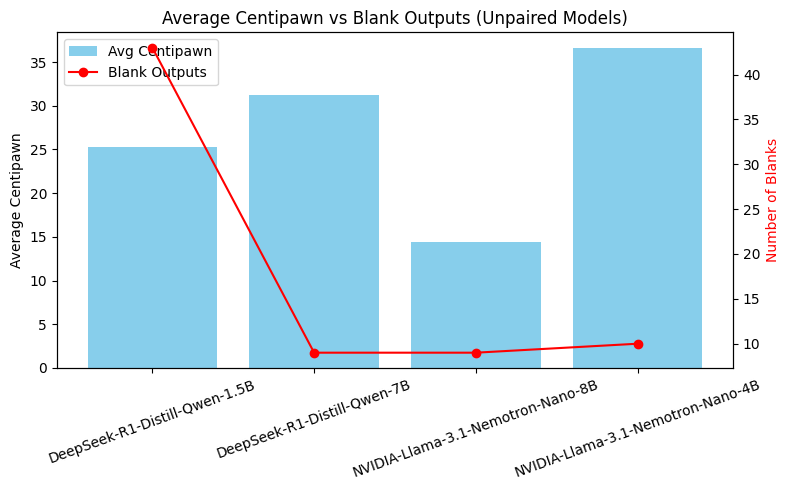

In [69]:
import matplotlib.pyplot as plt

# Data
models_unpaired = [
    "DeepSeek-R1-Distill-Qwen-1.5B",
    "DeepSeek-R1-Distill-Qwen-7B",
    "NVIDIA-Llama-3.1-Nemotron-Nano-8B",
    "NVIDIA-Llama-3.1-Nemotron-Nano-4B",
]
avg_centipawn_unpaired = [25.33, 31.24, 14.37, 36.58]
blanks_unpaired = [43, 9, 9, 10]

fig, ax1 = plt.subplots(figsize=(8, 5))

# Centipawn bars
ax1.bar(models_unpaired, avg_centipawn_unpaired, color="skyblue", label="Avg Centipawn")
ax1.set_ylabel("Average Centipawn")
ax1.tick_params(axis='x', rotation=20)

# Secondary axis for blanks
ax2 = ax1.twinx()
ax2.plot(models_unpaired, blanks_unpaired, color="red", marker="o", label="Blank Outputs")
ax2.set_ylabel("Number of Blanks", color="red")

# Combine legends
lns = ax1.get_legend_handles_labels()
lns2 = ax2.get_legend_handles_labels()
ax1.legend(lns[0] + lns2[0], lns[1] + lns2[1], loc="upper left")

plt.title("Average Centipawn vs Blank Outputs (Unpaired Models)")
plt.tight_layout()
plt.show()

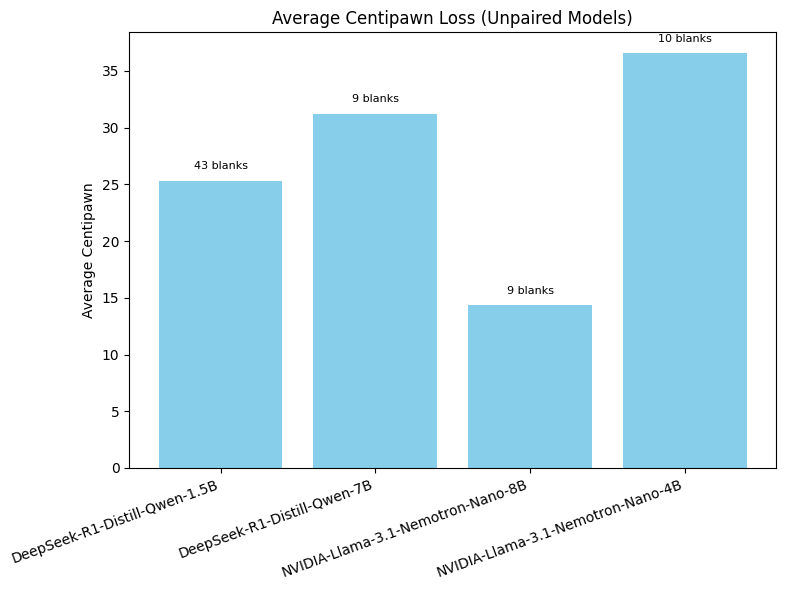

In [74]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models_unpaired, avg_centipawn_unpaired, color="skyblue")

for i, val in enumerate(blanks_unpaired):
    plt.text(i, avg_centipawn_unpaired[i] + 1, f"{val} blanks", ha='center', fontsize=8)

plt.title("Average Centipawn Loss (Unpaired Models)")
plt.ylabel("Average Centipawn")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

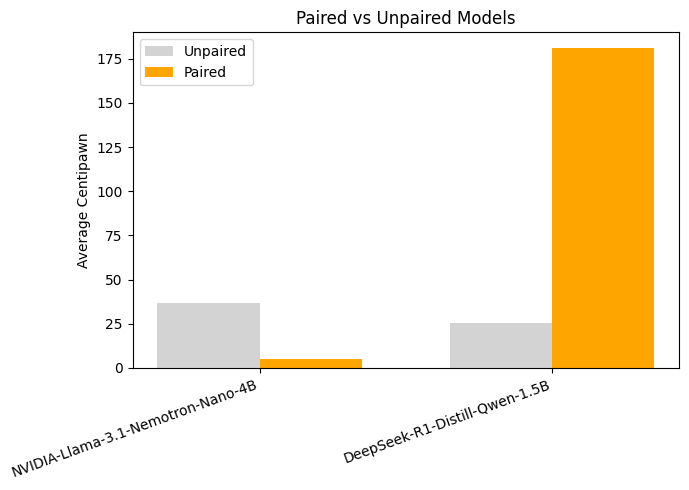

In [77]:
import matplotlib.pyplot as plt

# Data extracted from image
models_unpaired = [
    "DeepSeek-R1-Distill-Qwen-1.5B",
    "DeepSeek-R1-Distill-Qwen-7B",
    "NVIDIA-Llama-3.1-Nemotron-Nano-8B",
    "NVIDIA-Llama-3.1-Nemotron-Nano-4B",
]
avg_centipawn_unpaired = [25.33, 31.24, 14.37, 36.58]

# Paired vs Unpaired comparison
models_paired = ["NVIDIA-Llama-3.1-Nemotron-Nano-4B", "DeepSeek-R1-Distill-Qwen-1.5B"]
avg_centipawn_paired = [5.17, 180.85]
avg_centipawn_unpaired_subset = [36.58, 25.33]

plt.figure(figsize=(7, 5))
bar_width = 0.35
x = range(len(models_paired))
plt.bar([i - bar_width/2 for i in x], avg_centipawn_unpaired_subset, bar_width, label="Unpaired", color="lightgray")
plt.bar([i + bar_width/2 for i in x], avg_centipawn_paired, bar_width, label="Paired", color="orange")
plt.xticks(x, models_paired, rotation=20, ha="right")
plt.ylabel("Average Centipawn")
plt.title("Paired vs Unpaired Models")
plt.legend()
plt.tight_layout()
plt.show()

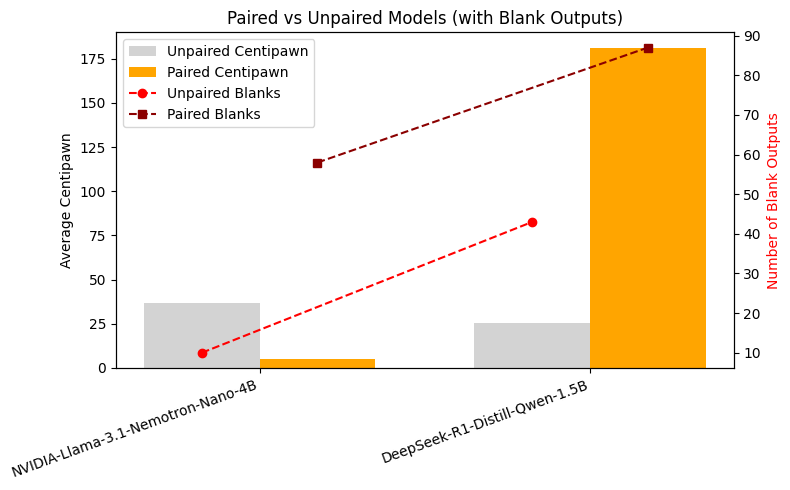

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Data (from your screenshot)
models_paired = ["NVIDIA-Llama-3.1-Nemotron-Nano-4B", "DeepSeek-R1-Distill-Qwen-1.5B"]
avg_centipawn_paired = [5.17, 180.85]
avg_centipawn_unpaired_subset = [36.58, 25.33]

# Blank counts (paired, unpaired)
blanks_unpaired = [10, 43]
blanks_paired = [58, 87]

x = np.arange(len(models_paired))
width = 0.35

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart for centipawn
bars_unpaired = ax1.bar(x - width/2, avg_centipawn_unpaired_subset, width, label="Unpaired Centipawn", color="lightgray")
bars_paired = ax1.bar(x + width/2, avg_centipawn_paired, width, label="Paired Centipawn", color="orange")

ax1.set_ylabel("Average Centipawn")
ax1.set_xticks(x)
ax1.set_xticklabels(models_paired, rotation=20, ha="right")
ax1.set_title("Paired vs Unpaired Models (with Blank Outputs)")

# Second y-axis for blank counts
ax2 = ax1.twinx()
ax2.plot(x - width/2, blanks_unpaired, "o--", color="red", label="Unpaired Blanks")
ax2.plot(x + width/2, blanks_paired, "s--", color="darkred", label="Paired Blanks")
ax2.set_ylabel("Number of Blank Outputs", color="red")

# Combine legends
lns = ax1.get_legend_handles_labels()
lns2 = ax2.get_legend_handles_labels()
ax1.legend(lns[0] + lns2[0], lns[1] + lns2[1], loc="upper left")

plt.tight_layout()
plt.show()

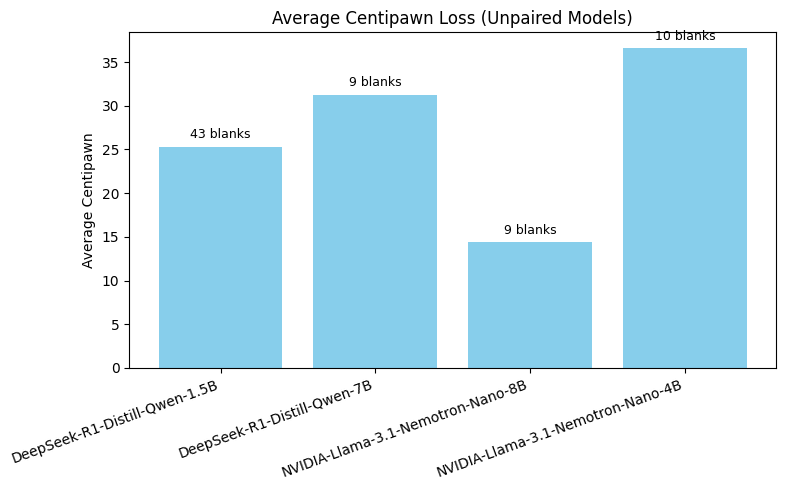

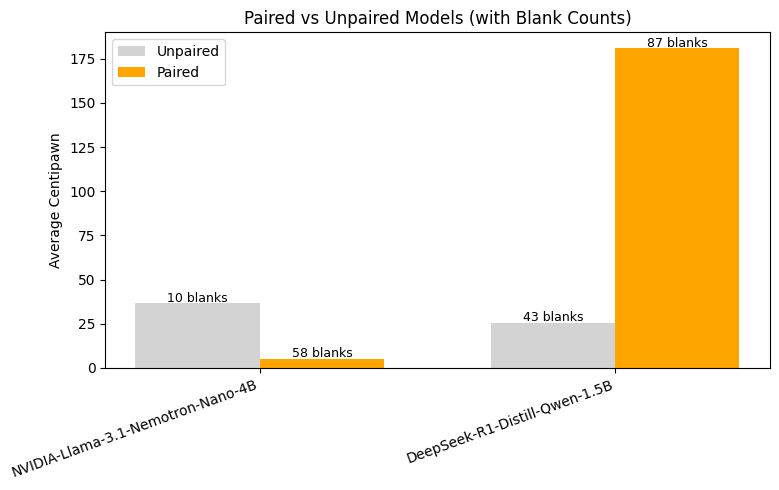

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# ==== UNPAIRED MODELS ====
models_unpaired = [
    "DeepSeek-R1-Distill-Qwen-1.5B",
    "DeepSeek-R1-Distill-Qwen-7B",
    "NVIDIA-Llama-3.1-Nemotron-Nano-8B",
    "NVIDIA-Llama-3.1-Nemotron-Nano-4B",
]
avg_centipawn_unpaired = [25.33, 31.24, 14.37, 36.58]
blanks_unpaired = [43, 9, 9, 10]

plt.figure(figsize=(8, 5))
bars = plt.bar(models_unpaired, avg_centipawn_unpaired, color="skyblue")

# Annotate each bar with blank count, slightly above the bar
for i, val in enumerate(blanks_unpaired):
    plt.text(i, avg_centipawn_unpaired[i] + 1, f"{val} blanks", 
             ha='center', va='bottom', fontsize=10)

# Increase y-limit for better spacing above bars
max_val = max(avg_centipawn_unpaired)
plt.ylim(0, max_val * 1.25)

plt.title("Average Centipawn Loss (Unpaired Models)", fontsize=14)
plt.ylabel("Average Centipawn", fontsize=12)
plt.xticks(rotation=20, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# ==== PAIRED VS UNPAIRED ====
models_paired = ["NVIDIA-Llama-3.1-Nemotron-Nano-4B", "DeepSeek-R1-Distill-Qwen-1.5B"]
avg_centipawn_paired = [5.17, 180.85]
avg_centipawn_unpaired_subset = [36.58, 25.33]
blanks_unpaired = [10, 43]
blanks_paired = [58, 87]

x = np.arange(len(models_paired))
width = 0.35

plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, avg_centipawn_unpaired_subset, width, label="Unpaired", color="lightgray")
bars2 = plt.bar(x + width/2, avg_centipawn_paired, width, label="Paired", color="orange")

# Annotate blanks directly above each bar
for i, val in enumerate(blanks_unpaired):
    plt.text(x[i] - width/2, avg_centipawn_unpaired_subset[i] + 1, f"{val} blanks", ha='center', fontsize=9)
for i, val in enumerate(blanks_paired):
    plt.text(x[i] + width/2, avg_centipawn_paired[i] + 1, f"{val} blanks", ha='center', fontsize=9)

plt.xticks(x, models_paired, rotation=20, ha="right")
plt.ylabel("Average Centipawn")
plt.title("Paired vs Unpaired Models (with Blank Counts)")
plt.legend()
plt.tight_layout()
plt.show()